# LBF5x5-n2-f3-static-v2 Heuristic Meta Pi experiment analysis 

In [1]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents
import posggym_agents.exp.plot_utils as policy_plot_utils

import baposgmcp.plot as plot_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, "experiments", "lbf", "LBF5x5-n2-f3-static-v2", "results", "heuristic_meta_pi_results_v0.csv"
)
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "lbf5x5_n2_f3_static_v2", "results", "heuristic_pairwise_results.csv"
)

## Loading Heuristic Policy Data

In [2]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True
)
policy_df.columns

coplayer_policy_ids = policy_df["policy_id"].unique().tolist()
coplayer_policy_ids.sort()
print("Policies")
print("--------")
for pi_id in coplayer_policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in policy_df.columns:
    print("  ", c)

Policies
--------
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0

Columns
-------
   Unnamed: 0
   exp_id
   agent_id
   env_name
   policy_id
   exp_seed
   num_episodes
   time_limit
   episode_return_mean
   episode_return_std
   episode_return_max
   episode_return_min
   episode_step_mean
   episode_step_std
   episode_time_mean
   episode_time_std
   num_episode_done
   num_LOSS
   num_DRAW
   num_WIN
   num_NA
   episode_return_CI
   episode_step_CI
   episode_time_CI
   prop_LOSS
   prop_DRAW
   prop_WIN
   prop_NA
   coplayer_policy_id


## Loading BAPOSGMCP Data

In [3]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_greedy_10
   POMetaRollout_pucb_greedy_100
   POMetaRollout_pucb_greedy_1000
   POMetaRollout_pucb_greedy_2500
   POMetaRollout_pucb_greedy_50
   POMetaRollout_pucb_greedy_500
   POMetaRollout_pucb_softmax_10
   POMetaRollout_pucb_softmax_100
   POMetaRollout_pucb_softmax_1000
   POMetaRollout_pucb_softmax_2500
   POMetaRollout_pucb_softmax_50
   POMetaRollout_pucb_softmax_500
   POMetaRollout_pucb_uniform_10
   POMetaRollout_pucb_uniform_100
   POMetaRollout_pucb_uniform_1000
   POMetaRollout_pucb_uniform_2500
   POMetaRollout_pucb_uniform_50
   POMetaRollout_pucb_uniform_500
   POMeta_greedy_10
   POMeta_greedy_100
   POMeta_greedy_1000
   POMeta_greedy_2500
   POMeta_greedy_50
   POMeta_greedy_500
   POMeta_softmax_10
   POMeta_softmax_100
   POMeta_softmax_1000
   POMeta_softmax_2500
   POMeta_softmax_50
   POMeta_softmax_500
   POMeta_uniform_10
   POMeta_uniform_100
   POMeta_uniform_1000
   POMeta_uniform_2500
   POMeta_uniform_50
   POMet

## Combine data

In [4]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([baposgmcp_df, policy_df]).reset_index(drop=True)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_greedy_10
   POMetaRollout_pucb_greedy_100
   POMetaRollout_pucb_greedy_1000
   POMetaRollout_pucb_greedy_2500
   POMetaRollout_pucb_greedy_50
   POMetaRollout_pucb_greedy_500
   POMetaRollout_pucb_softmax_10
   POMetaRollout_pucb_softmax_100
   POMetaRollout_pucb_softmax_1000
   POMetaRollout_pucb_softmax_2500
   POMetaRollout_pucb_softmax_50
   POMetaRollout_pucb_softmax_500
   POMetaRollout_pucb_uniform_10
   POMetaRollout_pucb_uniform_100
   POMetaRollout_pucb_uniform_1000
   POMetaRollout_pucb_uniform_2500
   POMetaRollout_pucb_uniform_50
   POMetaRollout_pucb_uniform_500
   POMeta_greedy_10
   POMeta_greedy_100
   POMeta_greedy_1000
   POMeta_greedy_2500
   POMeta_greedy_50
   POMeta_greedy_500
   POMeta_softmax_10
   POMeta_softmax_100
   POMeta_softmax_1000
   POMeta_softmax_2500
   POMeta_softmax_50
   POMeta_softmax_500
   POMeta_uniform_10
   POMeta_uniform_100
   POMeta_uniform_1000
   POMeta_uniform_2500
   POMeta_uniform_50
   POMet

## Pairwise performance by number of simulations

Here we look at the performance of each policy against each other policy including BAPOSGMCP using different number of simulations.

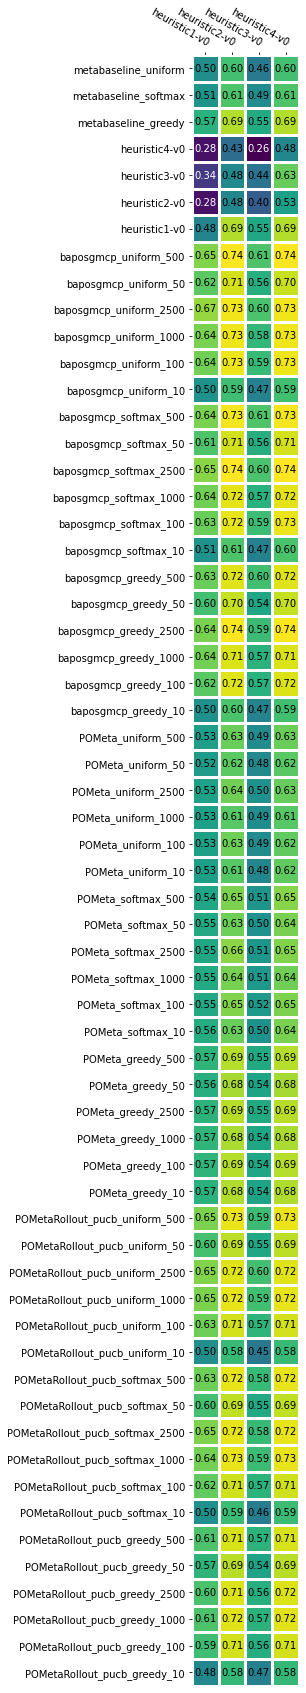

In [5]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_return_mean", 
    policy_key="policy_id",
    y_err_key=None,   # See next plot
    vrange=None, 
    figsize=(16, 30), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

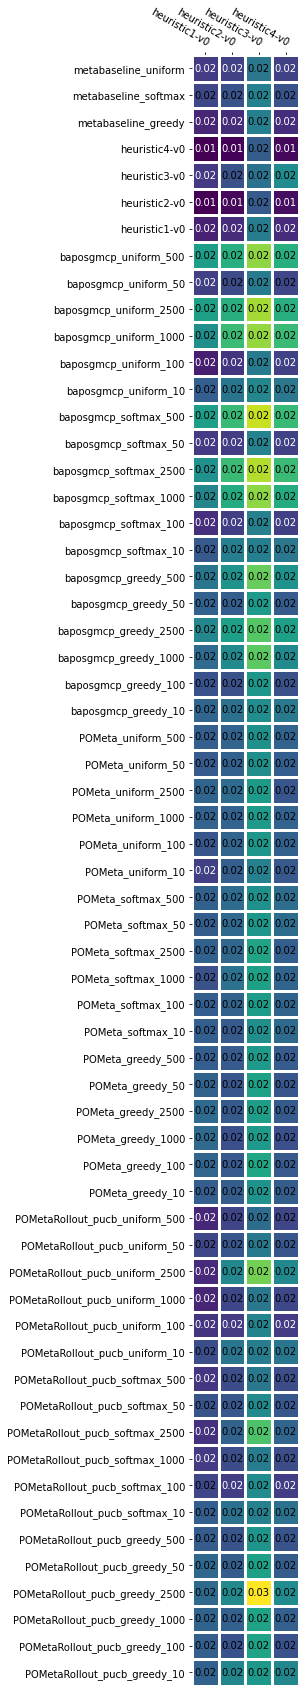

In [6]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_return_CI", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(16, 30), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

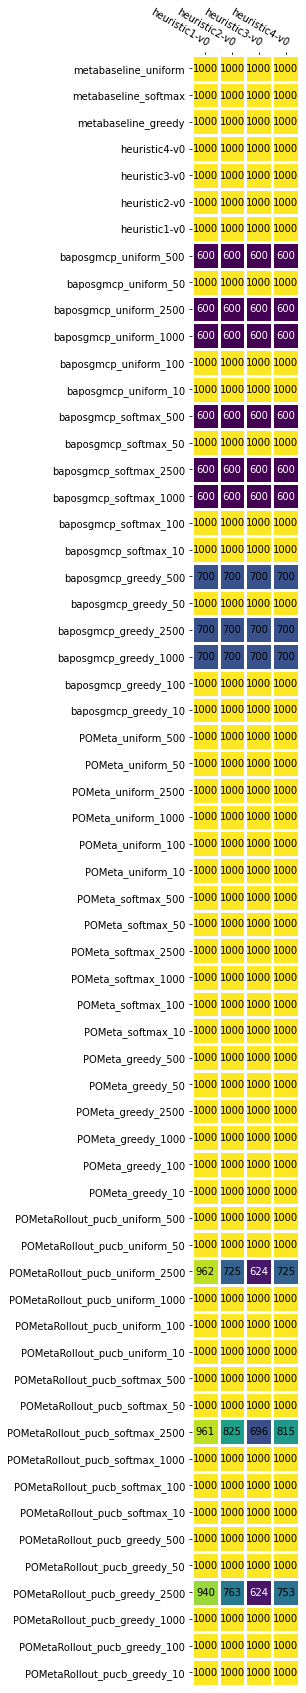

In [7]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(16, 30), 
    valfmt="{x:.0f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Prior Performance

Here we look at the expected performance against the policy prior of BAPOSGMCP.

In [8]:
policy_prior = {1: {
    "heuristic1-v0": 1/4,
    "heuristic2-v0": 1/4,
    "heuristic3-v0": 1/4,
    "heuristic4-v0": 1/4
}}

# Plot via num sims
policies_with_sims = [
    "POMetaRollout_pucb_greedy",
    "POMetaRollout_pucb_softmax",
    "POMetaRollout_pucb_uniform",
    "POMeta_greedy",
    "POMeta_softmax",
    "POMeta_uniform",
    "baposgmcp_greedy",
    "baposgmcp_softmax",
    "baposgmcp_uniform"
]

policies_without_sims = [
    "metabaseline_greedy",
    "metabaseline_softmax",
    "metabaseline_uniform",
]

In [9]:
expected_mean_returns_values, expected_mean_returns_err_values, policy_ids = plot_utils.get_expected_values_by_prior(
    combined_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_key="policy_id",
    policy_prior=policy_prior
)
for i, policy_id in enumerate(policy_ids):
    value = expected_mean_returns_values[i]
    err_value = expected_mean_returns_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")

POMetaRollout_pucb_greedy_10 = 0.53 +/- 0.02
POMetaRollout_pucb_greedy_100 = 0.64 +/- 0.02
POMetaRollout_pucb_greedy_1000 = 0.65 +/- 0.02
POMetaRollout_pucb_greedy_2500 = 0.65 +/- 0.02
POMetaRollout_pucb_greedy_50 = 0.62 +/- 0.02
POMetaRollout_pucb_greedy_500 = 0.65 +/- 0.02
POMetaRollout_pucb_softmax_10 = 0.53 +/- 0.02
POMetaRollout_pucb_softmax_100 = 0.65 +/- 0.02
POMetaRollout_pucb_softmax_1000 = 0.67 +/- 0.02
POMetaRollout_pucb_softmax_2500 = 0.67 +/- 0.02
POMetaRollout_pucb_softmax_50 = 0.63 +/- 0.02
POMetaRollout_pucb_softmax_500 = 0.67 +/- 0.02
POMetaRollout_pucb_uniform_10 = 0.53 +/- 0.02
POMetaRollout_pucb_uniform_100 = 0.66 +/- 0.02
POMetaRollout_pucb_uniform_1000 = 0.67 +/- 0.02
POMetaRollout_pucb_uniform_2500 = 0.67 +/- 0.02
POMetaRollout_pucb_uniform_50 = 0.63 +/- 0.02
POMetaRollout_pucb_uniform_500 = 0.67 +/- 0.02
POMeta_greedy_10 = 0.62 +/- 0.02
POMeta_greedy_100 = 0.62 +/- 0.02
POMeta_greedy_1000 = 0.62 +/- 0.02
POMeta_greedy_2500 = 0.63 +/- 0.02
POMeta_greedy_50 = 0.61

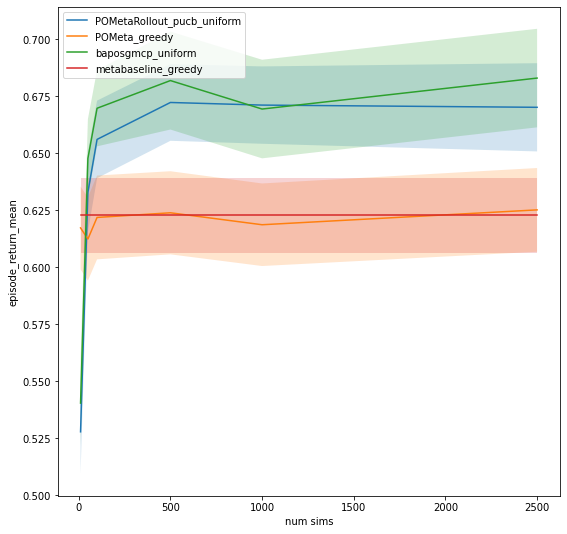

In [10]:
plot_utils.plot_expected_values_by_num_sims(
    y_key="episode_return_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=policy_ids,
    # policies_with_sims=policies_with_sims,
    policies_with_sims=[
        ##"POMetaRollout_pucb_greedy",
        ##"POMetaRollout_pucb_softmax",
        "POMetaRollout_pucb_uniform",
        "POMeta_greedy",
        ## "POMeta_softmax",
        ## "POMeta_uniform",
        # "baposgmcp_greedy",
        # "baposgmcp_softmax",
        "baposgmcp_uniform"
    ],
    # policies_without_sims=policies_without_sims
    policies_without_sims=[
        "metabaseline_greedy",
        # "metabaseline_softmax",
        # "metabaseline_uniform",
    ]
)

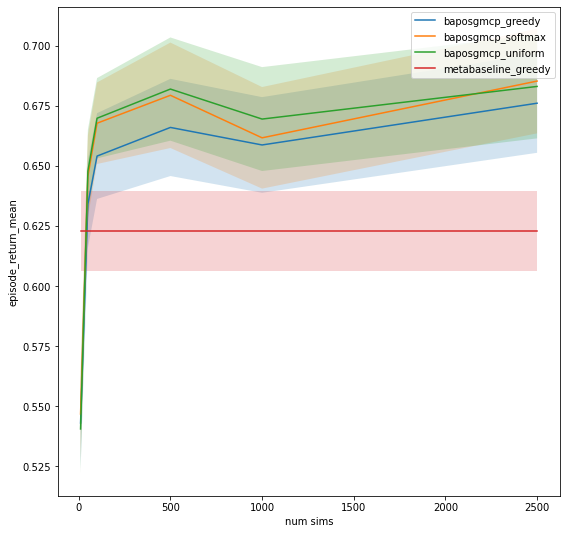

In [24]:
plot_utils.plot_expected_values_by_num_sims(
    y_key="episode_return_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=policy_ids,
    # policies_with_sims=policies_with_sims,
    policies_with_sims=[
        "baposgmcp_greedy",
        "baposgmcp_softmax",
        "baposgmcp_uniform"
    ],
    # policies_without_sims=policies_without_sims
    policies_without_sims=[
        "metabaseline_greedy",
        # "metabaseline_softmax",
        # "metabaseline_uniform",
    ]
)

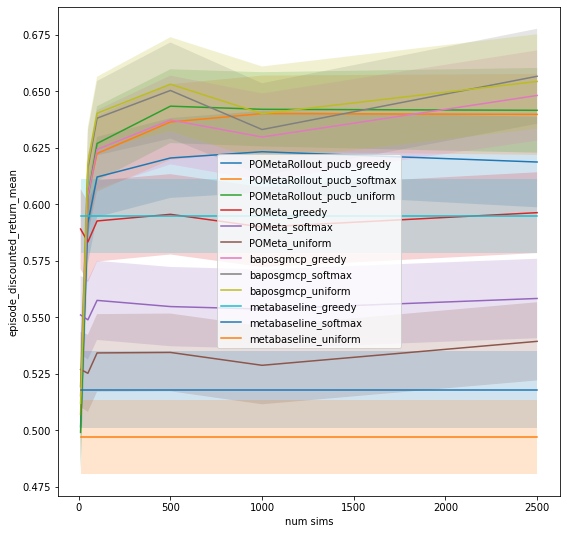

In [11]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_discounted_return_mean",
    y_err_key="episode_discounted_return_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

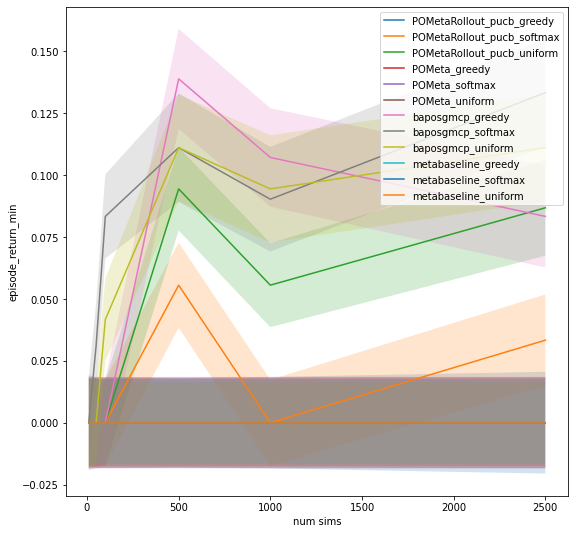

In [12]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_return_min",
    y_err_key="episode_return_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

## Looking at time

   - episode_steps
   - search_time
   - update_time
   - reinvigoration_time
   - policy_calls
   - inference_time
   - search_depth

In [13]:
policies_with_times = [
    "POMetaRollout_pucb_greedy",
    "POMetaRollout_pucb_softmax",
    "POMetaRollout_pucb_uniform",
    "POMeta_greedy",
    "POMeta_softmax",
    "POMeta_uniform",
    "baposgmcp_greedy",
    "baposgmcp_softmax",
    "baposgmcp_uniform"
]

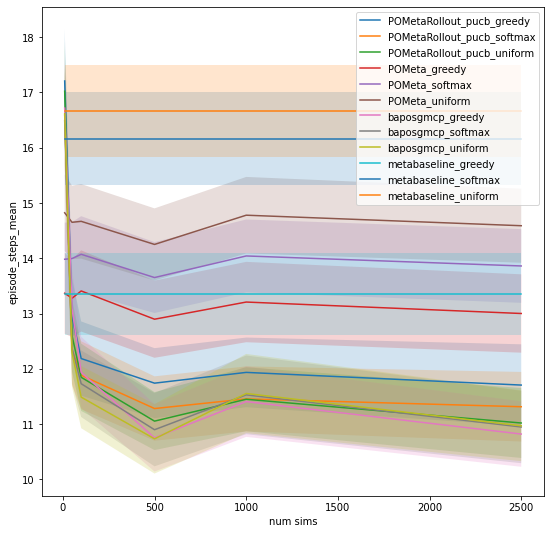

In [14]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_steps_mean",
    y_err_key="episode_steps_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

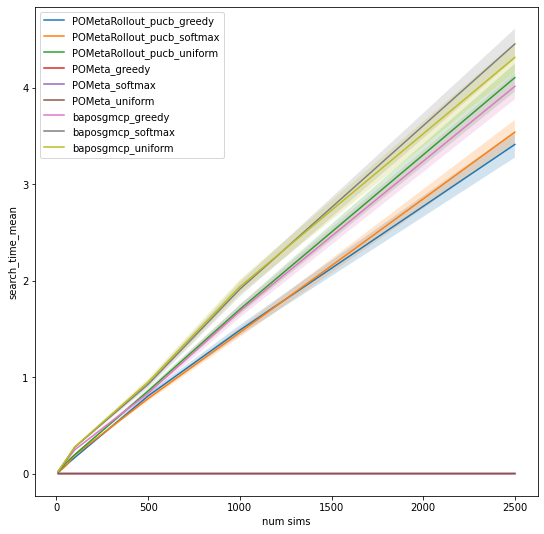

In [15]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_time_mean",
    y_err_key="search_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

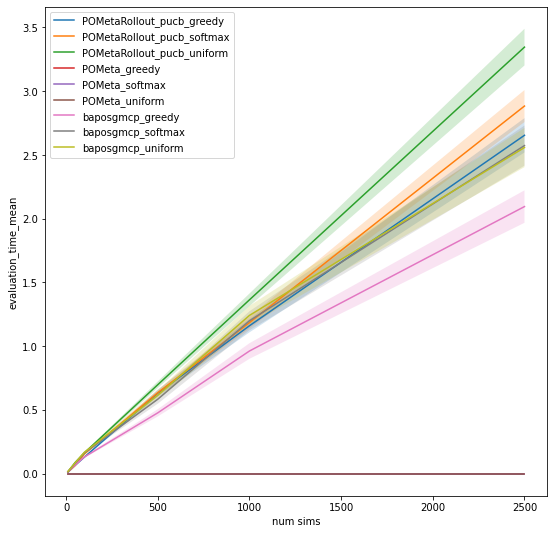

In [16]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="evaluation_time_mean",
    y_err_key="evaluation_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

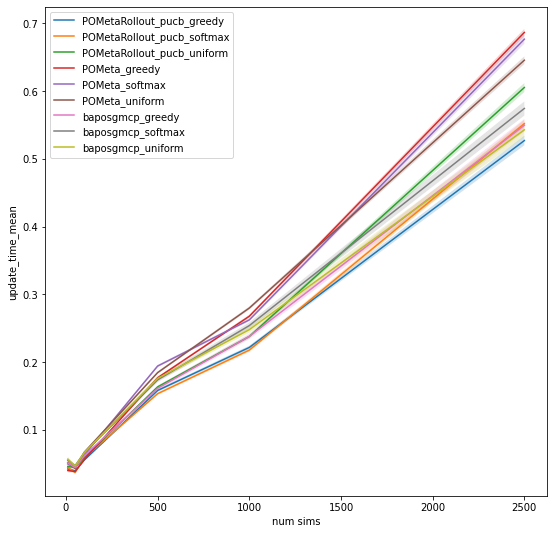

In [17]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="update_time_mean",
    y_err_key="update_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

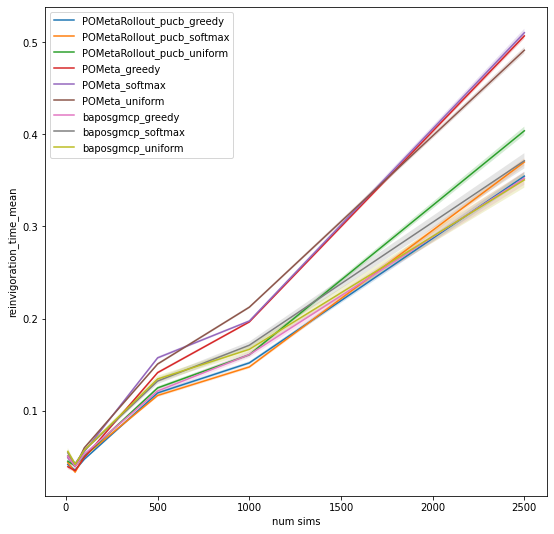

In [18]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="reinvigoration_time_mean",
    y_err_key="reinvigoration_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

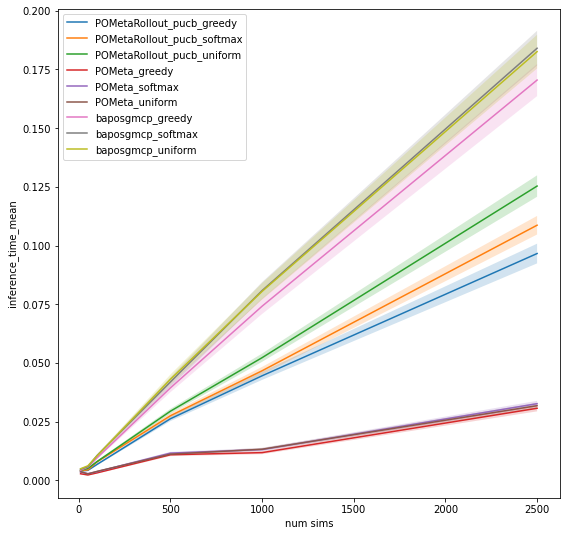

In [19]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="inference_time_mean",
    y_err_key="inference_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

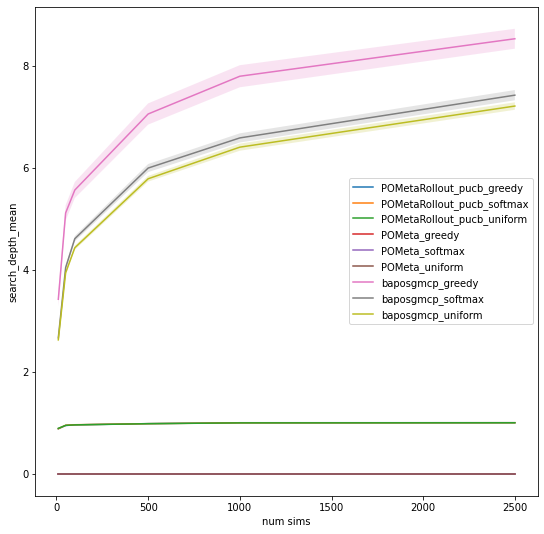

In [20]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_depth_mean",
    y_err_key="search_depth_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

## Looking at Belief accuracy by steps

- action_dist_distance
- bayes_accuracy

In [21]:
policy_ids_by_alg = [
    ["baposgmcp_greedy_10", "baposgmcp_greedy_50", "baposgmcp_greedy_100", "baposgmcp_greedy_500", "baposgmcp_greedy_1000", "baposgmcp_greedy_2500"],
    ["baposgmcp_softmax_10", "baposgmcp_softmax_50", "baposgmcp_softmax_100", "baposgmcp_softmax_500", "baposgmcp_softmax_1000", "baposgmcp_softmax_2500"],
    ["baposgmcp_uniform_10", "baposgmcp_uniform_50", "baposgmcp_uniform_100", "baposgmcp_uniform_500", "baposgmcp_uniform_1000", "baposgmcp_uniform_2500"]
]

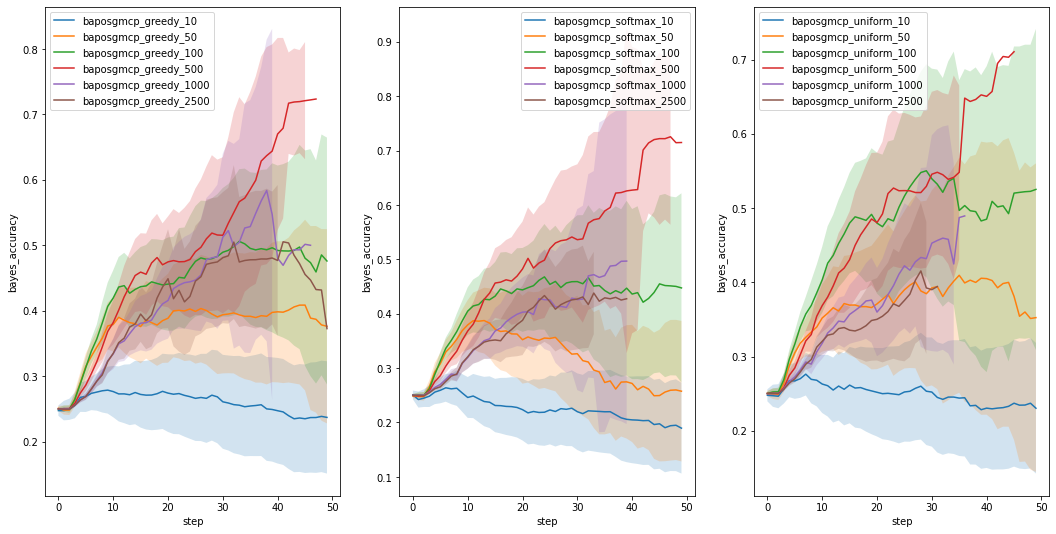

In [22]:
plot_utils.plot_expected_belief_stat_by_step(
    combined_df,
    y_key_prefix="bayes_accuracy",
    policy_ids=policy_ids_by_alg,
    policy_prior=policy_prior,
    step_limit=50,
    other_agent_id=1,
    policy_key="policy_id",
    coplayer_policy_key="coplayer_policy_id",
    y_suffix="mean",
    y_err_suffix="CI",
    figsize=(18, 9)
)

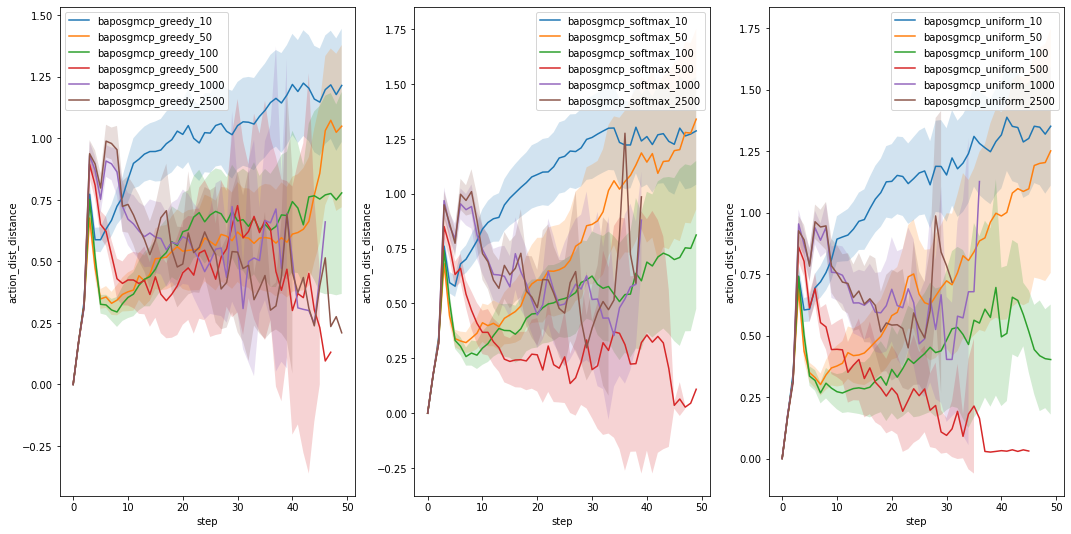

In [23]:
plot_utils.plot_expected_belief_stat_by_step(
    combined_df,
    y_key_prefix="action_dist_distance",
    policy_ids=policy_ids_by_alg,
    policy_prior=policy_prior,
    step_limit=50,
    other_agent_id=1,
    policy_key="policy_id",
    coplayer_policy_key="coplayer_policy_id",
    y_suffix="mean",
    y_err_suffix="CI",
    figsize=(18, 9)
)